In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_pickle('stock_prediction_data2.p')

In [9]:
df.head()

,Date,Ticker,NewsHeadlineList,NewsSourceList,NewsSummaryList,NewsUrlList,NewsHeadlineCountList,TweetList,TweetTimeList,Open,High,Low,Close,AdjClose,Volume,TomorrowClose,DayReturn
333,2021-01-04,AMD,[Advanced Micro Devices Inc. stock outperforms...,"[MarketWatch, Nasdaq, MarketWatch, Benzinga, N...",[Shares of Advanced Micro Devices Inc. inched ...,[https://finnhub.io/api/news?id=8168bc590262db...,"[1, 1, 1, 1, 1]",[RT @EliteOptions2: $TSLA - Trade Idea - Jan 8...,"[2021-01-05T04:57:34.000Z, 2021-01-05T04:52:46...",92.110001,96.059998,90.919998,92.300003,92.300003,51802600.0,92.769997,0.005092
334,2021-01-05,AMD,[Advanced Micro Devices Inc. stock rises Tuesd...,"[MarketWatch, Nasdaq, Nasdaq]",[Shares of Advanced Micro Devices Inc. inched ...,[https://finnhub.io/api/news?id=39060fd37e8f38...,"[1, 1, 1]",[Tencent invests in Chinese A.I. chip start-up...,"[2021-01-06T04:58:56.000Z, 2021-01-06T04:56:26...",92.099998,93.209999,91.410004,92.769997,92.769997,34208000.0,90.330002,-0.026302
335,2021-01-06,AMD,[Are These The Top Tech Stocks To Watch Right ...,"[Nasdaq, MarketWatch, Nasdaq, benzinga]",[Looking To Add The Best Tech Stocks To Your J...,[https://finnhub.io/api/news?id=ea31a0e2ad005b...,"[1, 1, 1, 1]",[$AMD weak close &amp; into the VPVR gap area....,"[2021-01-07T04:59:12.000Z, 2021-01-07T04:48:45...",91.620003,92.279999,89.459999,90.330002,90.330002,51911700.0,95.160004,0.053471
336,2021-01-07,AMD,[Advanced Micro Devices Inc. stock underperfor...,"[MarketWatch, MarketWatch]",[Shares of Advanced Micro Devices Inc. rallied...,[https://finnhub.io/api/news?id=fc238c17bec5ff...,"[1, 1]",[$FCX Odds of Freeport-McMoRan Stock Hitting $...,"[2021-01-08T04:58:18.000Z, 2021-01-08T04:52:04...",91.330002,95.510002,91.199997,95.160004,95.160004,42897200.0,94.580002,-0.006095
337,2021-01-08,AMD,[Advanced Micro Devices Inc. stock falls Frida...,"[MarketWatch, Nasdaq, MarketWatch, Benzinga, N...",[Shares of Advanced Micro Devices Inc. slid 0....,[https://finnhub.io/api/news?id=db389d33ab4e7f...,"[1, 1, 1, 1, 1, 1]",[$AMD in Uptrend: Stochastic indicator peaks a...,"[2021-01-09T04:51:08.000Z, 2021-01-09T04:38:21...",95.980003,96.400002,93.269997,94.580002,94.580002,39816400.0,97.250000,0.028230


In [10]:
df.describe()

,Open,High,Low,Close,AdjClose,Volume,TomorrowClose,DayReturn
count,325.000000,325.000000,325.000000,325.000000,325.000000,3.250000e+02,324.000000,324.000000
mean,351.425108,358.124000,343.406708,350.984677,350.958073,4.196714e+07,351.783086,0.119575
std,312.115475,318.365196,304.832878,311.919367,311.904477,3.497574e+07,312.069055,2.166418
min,10.430000,10.880000,10.400000,10.470000,10.462285,4.099500e+06,10.470000,-0.871723
25%,75.849998,76.949997,73.860001,73.959999,73.959999,1.690530e+07,59.012499,-0.016255
50%,498.000000,502.000000,467.170013,494.809998,494.639252,3.776730e+07,496.634995,0.001042
75%,621.460022,632.299988,605.030029,619.119995,619.119995,5.421480e+07,619.699997,0.020485
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.058053e+08,883.090027,38.980181


In [11]:
df['NumTweets'] = df['TweetList'].apply(len)

In [12]:
df.head()

,Date,Ticker,NewsHeadlineList,NewsSourceList,NewsSummaryList,NewsUrlList,NewsHeadlineCountList,TweetList,TweetTimeList,Open,High,Low,Close,AdjClose,Volume,TomorrowClose,DayReturn,NumTweets
333,2021-01-04,AMD,[Advanced Micro Devices Inc. stock outperforms...,"[MarketWatch, Nasdaq, MarketWatch, Benzinga, N...",[Shares of Advanced Micro Devices Inc. inched ...,[https://finnhub.io/api/news?id=8168bc590262db...,"[1, 1, 1, 1, 1]",[RT @EliteOptions2: $TSLA - Trade Idea - Jan 8...,"[2021-01-05T04:57:34.000Z, 2021-01-05T04:52:46...",92.110001,96.059998,90.919998,92.300003,92.300003,51802600.0,92.769997,0.005092,837
334,2021-01-05,AMD,[Advanced Micro Devices Inc. stock rises Tuesd...,"[MarketWatch, Nasdaq, Nasdaq]",[Shares of Advanced Micro Devices Inc. inched ...,[https://finnhub.io/api/news?id=39060fd37e8f38...,"[1, 1, 1]",[Tencent invests in Chinese A.I. chip start-up...,"[2021-01-06T04:58:56.000Z, 2021-01-06T04:56:26...",92.099998,93.209999,91.410004,92.769997,92.769997,34208000.0,90.330002,-0.026302,572
335,2021-01-06,AMD,[Are These The Top Tech Stocks To Watch Right ...,"[Nasdaq, MarketWatch, Nasdaq, benzinga]",[Looking To Add The Best Tech Stocks To Your J...,[https://finnhub.io/api/news?id=ea31a0e2ad005b...,"[1, 1, 1, 1]",[$AMD weak close &amp; into the VPVR gap area....,"[2021-01-07T04:59:12.000Z, 2021-01-07T04:48:45...",91.620003,92.279999,89.459999,90.330002,90.330002,51911700.0,95.160004,0.053471,570
336,2021-01-07,AMD,[Advanced Micro Devices Inc. stock underperfor...,"[MarketWatch, MarketWatch]",[Shares of Advanced Micro Devices Inc. rallied...,[https://finnhub.io/api/news?id=fc238c17bec5ff...,"[1, 1]",[$FCX Odds of Freeport-McMoRan Stock Hitting $...,"[2021-01-08T04:58:18.000Z, 2021-01-08T04:52:04...",91.330002,95.510002,91.199997,95.160004,95.160004,42897200.0,94.580002,-0.006095,628
337,2021-01-08,AMD,[Advanced Micro Devices Inc. stock falls Frida...,"[MarketWatch, Nasdaq, MarketWatch, Benzinga, N...",[Shares of Advanced Micro Devices Inc. slid 0....,[https://finnhub.io/api/news?id=db389d33ab4e7f...,"[1, 1, 1, 1, 1, 1]",[$AMD in Uptrend: Stochastic indicator peaks a...,"[2021-01-09T04:51:08.000Z, 2021-01-09T04:38:21...",95.980003,96.400002,93.269997,94.580002,94.580002,39816400.0,97.250000,0.028230,482


In [14]:
# additional data on number of tweets associated with AMD
df.loc[df['Ticker']=='AMD', 'NumTweets'].describe()

count      80.000000
mean      992.487500
std       556.353771
min       438.000000
25%       696.500000
50%       827.500000
75%      1090.000000
max      3292.000000
Name: NumTweets, dtype: float64

In [15]:
# additional data on number of tweets associated with GE
df.loc[df['Ticker']=='GE', 'NumTweets'].describe()

count      81.000000
mean      324.246914
std       231.078479
min       147.000000
25%       197.000000
50%       223.000000
75%       334.000000
max      1289.000000
Name: NumTweets, dtype: float64

In [16]:
# additional data on number of tweets associated with TSLA
df.loc[df['Ticker']=='TSLA', 'NumTweets'].describe()

count      82.000000
mean     2391.524390
std        55.476661
min      2132.000000
25%      2380.250000
50%      2403.500000
75%      2427.000000
max      2465.000000
Name: NumTweets, dtype: float64

In [18]:
# additional data on number of tweets associated with NVDA
df.loc[df['Ticker']=='NVDA', 'NumTweets'].describe()

count      82.000000
mean      830.731707
std       443.694201
min       399.000000
25%       608.500000
50%       713.500000
75%       887.000000
max      3378.000000
Name: NumTweets, dtype: float64

In [19]:
x = df.loc[df['Ticker']=='TSLA', 'Date']
y = df.loc[df['Ticker']=='TSLA', 'NumTweets']

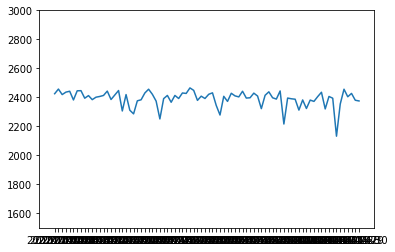

In [26]:
# Plot TSLA tweets over time
plt.plot(x,y)
plt.ylim([1500,3000])
plt.show()

In [27]:
x = df.loc[df['Ticker']=='NVDA', 'Date']
y = df.loc[df['Ticker']=='NVDA', 'NumTweets']

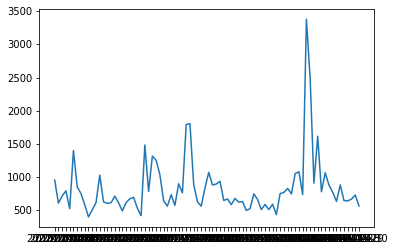

In [28]:
# Plot NVDA tweets over time
plt.plot(x,y)
#plt.ylim([1500,3000])
plt.show()